In [1]:
import pandas as pd

# List of CSV filenames
csv_files = ['best_case_results.csv', 'worst_case_results.csv', 'random_results.csv']

# Add headers to the CSVs
for filename in csv_files:
    df = pd.read_csv(filename, header=None, names=["Size", "Time (seconds)"])
    print(f"Contents of {filename}:")
    print(df.to_markdown(index=False))


Contents of best_case_results.csv:
|   Size |   Time (seconds) |
|-------:|-----------------:|
|    100 |         8e-06    |
|    500 |         2.3e-05  |
|   1000 |         3.8e-05  |
|   2500 |         7e-05    |
|   3000 |         4.8e-05  |
|   4500 |         5.8e-05  |
|   5000 |         5.9e-05  |
|   6500 |         7.6e-05  |
|   7500 |         8.8e-05  |
|  10000 |         0.000127 |
Contents of worst_case_results.csv:
|   Size |   Time (seconds) |
|-------:|-----------------:|
|    100 |         6.5e-05  |
|    500 |         0.001399 |
|   1000 |         0.005    |
|   2500 |         0.01993  |
|   3000 |         0.019559 |
|   4500 |         0.038872 |
|   5000 |         0.045823 |
|   6500 |         0.078043 |
|   7500 |         0.10452  |
|  10000 |         0.191383 |
Contents of random_results.csv:
|   Size |   Time (seconds) |
|-------:|-----------------:|
|    100 |         4.9e-05  |
|    500 |         0.000748 |
|   1000 |         0.002883 |
|   2500 |         0.013356

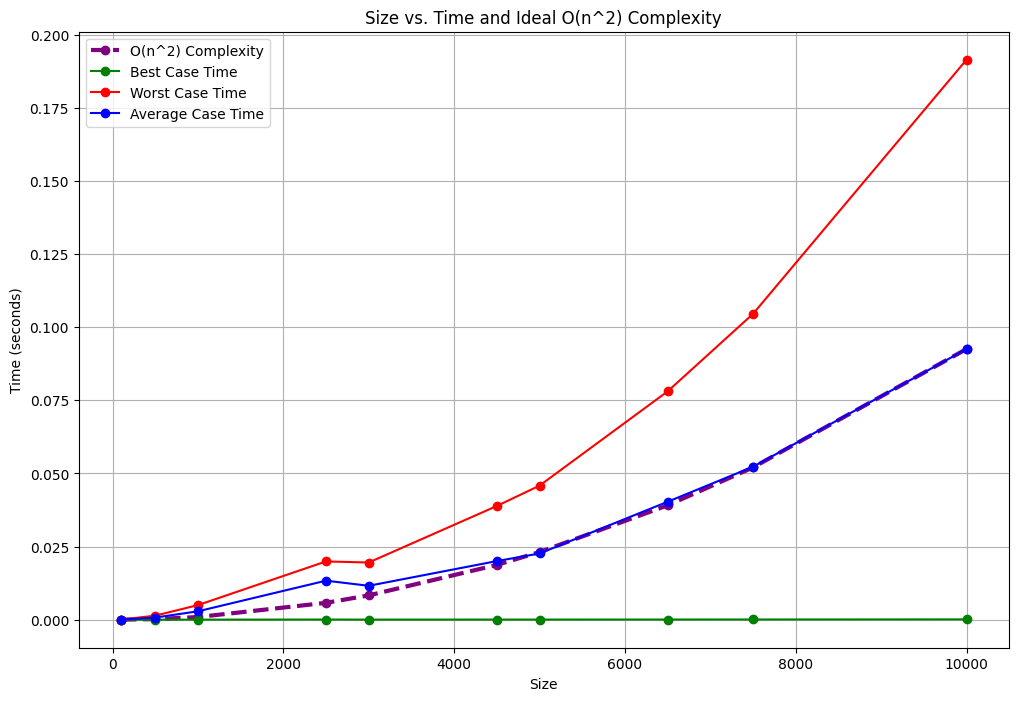

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read data and plot results for a given case
def plot_results(filename, label, color):
    df = pd.read_csv(filename, header=None, names=["Size", "Time (seconds)"])
    
    # Extract size and time data
    sizes = df['Size']
    times = df['Time (seconds)']
    
    # Plot measured times
    plt.plot(sizes, times, marker='o', linestyle='-', color=color, label=f'{label} Time')


# Plotting Size vs Ideal O(n^2) Complexity
df = pd.read_csv('random_results.csv', header=None, names=["Size", "Time (seconds)"])  # We can use any file for size data
sizes = df['Size']
max_size = max(sizes)
max_time = max(df['Time (seconds)'])
ideal_times = [(size ** 2 / max_size ** 2) * max_time for size in sizes]

plt.figure(figsize=(12, 8))
plt.plot(sizes, ideal_times, marker='o', linestyle='--', color='purple', linewidth=3, label='O(n^2) Complexity')

# Plot measured times again for visual comparison
plot_results('best_case_results.csv', 'Best Case', 'g')
plot_results('worst_case_results.csv', 'Worst Case', 'r')
plot_results('random_results.csv', 'Average Case', 'b')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('Size vs. Time and Ideal O(n^2) Complexity')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

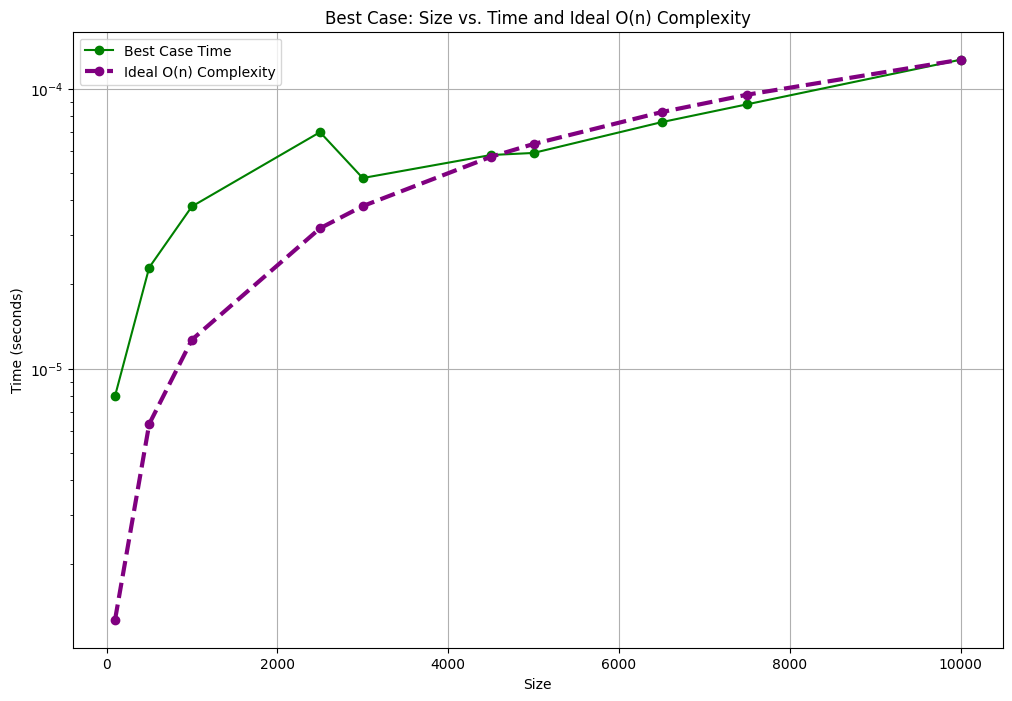

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot best case results and ideal O(n) complexity
def plot_best_case_with_ideal(filename):
    # Read data
    df = pd.read_csv(filename, header=None, names=["Size", "Time (seconds)"])
    
    # Extract size and time data
    sizes = df['Size']
    times = df['Time (seconds)']
    
    # Compute ideal O(n) times
    max_time = max(times)
    ideal_times = [size * max_time / max(sizes) for size in sizes]
    
    # Plot best case results
    plt.figure(figsize=(12, 8))
    plt.plot(sizes, times, marker='o', linestyle='-', color='g', label='Best Case Time')
    
    # Plot ideal O(n) complexity
    plt.plot(sizes, ideal_times, marker='o', linestyle='--', color='purple', linewidth=3, label='Ideal O(n) Complexity')

    # Add labels and title
    plt.xlabel('Size')
    plt.ylabel('Time (seconds)')
    plt.title('Best Case: Size vs. Time and Ideal O(n) Complexity')
    plt.yscale('log')  # Use logarithmic scale for better visibility of small values
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function with the best case results file
plot_best_case_with_ideal('best_case_results.csv')